<a href="https://colab.research.google.com/github/shani1610/object-insertion-video-diffusion/blob/main/human_evaluation/analyzing_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Survey Responses on Diffusion Model Video Quality

## Shani Israelov, MSc Thesis, TUT, Aug 2024

This notebook aims to analyze the results from a survey conducted as part of my MSc Thesis, which explored human preferences regarding diffusion model outputs.

The survey, accessible via this [link](https://forms.gle/iEVisbcU3VnLvdh5A)
, asked participants to watch and evaluate a series of 1-second videos generated using Diffusion Models. Each participant viewed a total of 8 videos, with 2 videos corresponding to each textual description, presented in random order. After watching each video, participants were asked to rate it on a scale from 1 to 10 based on three criteria:

* Textual Alignment: How well the video aligns with the provided text.

* Temporal Consistency: The smoothness and coherence of the sequence.

* Overall Quality: The general impression of the video's quality.

In the second part of the survey, participants were shown 4 pairs of videos and asked to choose the better option based on the same three aspects.

In [ ]:
import os
curr_dir = os.getcwd()
print("Current Directory:", curr_dir)

## Uploading the .cvs file

In [4]:
import pandas as pd
df = pd.read_csv('survey_data.csv')
df.head()


Timestamp Total score  \
0  2024/08/12 7:52:39 AM GMT+3    0.00 / 0   
1  2024/08/12 7:53:30 AM GMT+3    0.00 / 0   
2  2024/08/12 8:00:48 AM GMT+3    0.00 / 0   
3  2024/08/12 8:07:02 AM GMT+3    0.00 / 0   
4  2024/08/12 8:14:06 AM GMT+3    0.00 / 0   

   How well does the video align with the text: "A man is sitting on a green dining chair"?  \
0                                                7.0                                          
1                                                7.0                                          
2                                               10.0                                          
3                                               10.0                                          
4                                                8.0                                          

  How well does the video align with the text: "A man is sitting on a green dining chair"? [Score]  \
0                                             -- / 0                                                 
1                                             -- / 0                                                 
2                                             -- / 0                                                 
3                                             -- / 0                                                 
4                                             -- / 0                                                 

   How well does the video align with the text: "A man is sitting on a green dining chair"? [Feedback]  \
0                                                NaN                                                     
1                                                NaN                                                     
2                                                NaN                                                     
3                                                NaN                                                     
4                                                NaN                                                     

   How consistent is the visual content across the frames (temporal consistency)?  \
0                                                6.0                                
1                                                4.0                                
2                                                8.0                                
3                                                7.0                                
4                                                6.0                                

  How consistent is the visual content across the frames (temporal consistency)? [Score]  \
0                                             -- / 0                                       
1                                             -- / 0                                       
2                                             -- / 0                                       
3                                             -- / 0                                       
4                                             -- / 0                                       

   How consistent is the visual content across the frames (temporal consistency)? [Feedback]  \
0                                                NaN                                           
1                                                NaN                                           
2                                                NaN                                           
3                                                NaN                                           
4                                                NaN                                           

   How would you rate the overall quality of the video?  \
0                                                5.0      
1                                                7.0      
2                                                6.0      
3                                             

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 110 entries, Timestamp to Which option is aesthetically better? [Feedback].3
dtypes: float64(60), object(50)
memory usage: 16.5+ KB


## Preprocessing and noise removal

the responses csv file generated from google forms has a lot of unnessary entries.

for each question we also have score and feedback columns which we don't need.

in addition some of the participants haven't answer the all questions so we need to remove NaN entries.

In [6]:
df_selected_columns = df.iloc[:, 2::3].copy()
df_selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 36 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   How well does the video align with the text: "A man is sitting on a green dining chair"?    18 non-null     float64
 1   How consistent is the visual content across the frames (temporal consistency)?              18 non-null     float64
 2   How would you rate the overall quality of the video?                                        18 non-null     float64
 3   How well does the video align with the text: "A man is carrying a shopping bag"?            18 non-null     float64
 4   How consistent is the visual content across the frames (temporal consistency)?.1            18 non-null     float64
 5   How would you rate the overall quality of the

In [7]:
df_selected_columns.head()

How well does the video align with the text: "A man is sitting on a green dining chair"?  \
0                                                7.0                                          
1                                                7.0                                          
2                                               10.0                                          
3                                               10.0                                          
4                                                8.0                                          

   How consistent is the visual content across the frames (temporal consistency)?  \
0                                                6.0                                
1                                                4.0                                
2                                                8.0                                
3                                                7.0                                
4                                                6.0                                

   How would you rate the overall quality of the video?  \
0                                                5.0      
1                                                7.0      
2                                                6.0      
3                                                5.0      
4                                                7.0      

   How well does the video align with the text: "A man is carrying a shopping bag"?  \
0                                                9.0                                  
1                                                9.0                                  
2                                                9.0                                  
3                                               10.0                                  
4                                                8.0                                  

   How consistent is the visual content across the frames (temporal consistency)?.1  \
0                                                4.0                                  
1                                                8.0                                  
2                                                7.0                                  
3                                                4.0                                  
4                                                6.0                                  

   How would you rate the overall quality of the video?.1  \
0                                                6.0        
1                                                9.0        
2                                                5.0        
3                                                5.0        
4                                                7.0        

   How well does the video align with the text: "A man is swinging a blue tennis racket"?  \
0                                                4.0                                        
1                                               10.0                                        
2                                                6.0                                        
3                                               10.0                                        
4                                                7.0                                        

   How consistent is the visual content across the frames (temporal consistency)?.2  \
0                                                2.0                                  
1                                                4.0                                  
2                                                5.0                                  
3                                                4.0                                  
4                                                5.0                                  

   How would you rate the overall quality of the video?.2  \
0         

In [8]:
df_cleaned = df_selected_columns.dropna()
df_cleaned.head()

How well does the video align with the text: "A man is sitting on a green dining chair"?  \
0                                                7.0                                          
1                                                7.0                                          
2                                               10.0                                          
3                                               10.0                                          
4                                                8.0                                          

   How consistent is the visual content across the frames (temporal consistency)?  \
0                                                6.0                                
1                                                4.0                                
2                                                8.0                                
3                                                7.0                                
4                                                6.0                                

   How would you rate the overall quality of the video?  \
0                                                5.0      
1                                                7.0      
2                                                6.0      
3                                                5.0      
4                                                7.0      

   How well does the video align with the text: "A man is carrying a shopping bag"?  \
0                                                9.0                                  
1                                                9.0                                  
2                                                9.0                                  
3                                               10.0                                  
4                                                8.0                                  

   How consistent is the visual content across the frames (temporal consistency)?.1  \
0                                                4.0                                  
1                                                8.0                                  
2                                                7.0                                  
3                                                4.0                                  
4                                                6.0                                  

   How would you rate the overall quality of the video?.1  \
0                                                6.0        
1                                                9.0        
2                                                5.0        
3                                                5.0        
4                                                7.0        

   How well does the video align with the text: "A man is swinging a blue tennis racket"?  \
0                                                4.0                                        
1                                               10.0                                        
2                                                6.0                                        
3                                               10.0                                        
4                                                7.0                                        

   How consistent is the visual content across the frames (temporal consistency)?.2  \
0                                                2.0                                  
1                                                4.0                                  
2                                                5.0                                  
3                                                4.0                                  
4                                                5.0                                  

   How would you rate the overall quality of the video?.2  \
0         

## Numerical Columns

In [9]:
numerical_columns_df = df_cleaned.select_dtypes(include=['number'])
numerical_columns_df.head()


How well does the video align with the text: "A man is sitting on a green dining chair"?  \
0                                                7.0                                          
1                                                7.0                                          
2                                               10.0                                          
3                                               10.0                                          
4                                                8.0                                          

   How consistent is the visual content across the frames (temporal consistency)?  \
0                                                6.0                                
1                                                4.0                                
2                                                8.0                                
3                                                7.0                                
4                                                6.0                                

   How would you rate the overall quality of the video?  \
0                                                5.0      
1                                                7.0      
2                                                6.0      
3                                                5.0      
4                                                7.0      

   How well does the video align with the text: "A man is carrying a shopping bag"?  \
0                                                9.0                                  
1                                                9.0                                  
2                                                9.0                                  
3                                               10.0                                  
4                                                8.0                                  

   How consistent is the visual content across the frames (temporal consistency)?.1  \
0                                                4.0                                  
1                                                8.0                                  
2                                                7.0                                  
3                                                4.0                                  
4                                                6.0                                  

   How would you rate the overall quality of the video?.1  \
0                                                6.0        
1                                                9.0        
2                                                5.0        
3                                                5.0        
4                                                7.0        

   How well does the video align with the text: "A man is swinging a blue tennis racket"?  \
0                                                4.0                                        
1                                               10.0                                        
2                                                6.0                                        
3                                               10.0                                        
4                                                7.0                                        

   How consistent is the visual content across the frames (temporal consistency)?.2  \
0                                                2.0                                  
1                                                4.0                                  
2                                                5.0                                  
3                                                4.0                                  
4                                                5.0                                  

   How would you rate the overall quality of the video?.2  \
0         

In [10]:
# Calculate the mean for each numerical column
column_means = numerical_columns_df.mean()
print(column_means)

How well does the video align with the text: "A man is sitting on a green dining chair"?      8.176471
How consistent is the visual content across the frames (temporal consistency)?                4.764706
How would you rate the overall quality of the video?                                          5.000000
How well does the video align with the text: "A man is carrying a shopping bag"?              8.647059
How consistent is the visual content across the frames (temporal consistency)?.1              5.823529
How would you rate the overall quality of the video?.1                                        6.117647
How well does the video align with the text: "A man is swinging a blue tennis racket"?        7.294118
How consistent is the visual content across the frames (temporal consistency)?.2              4.529412
How would you rate the overall quality of the video?.2                                        5.294118
How well does the video align with the text: "A man is dragging a red sui

## Selecting Columns

in the survey we have videos generated from video where the object is present and video where the object is absent.

this information is not given to the participants and the videos were shown in random way.

the question indexes that correspond to the object-present-videos are:

[0, 1, 2, 3, 4, 5, 18, 19, 20, 21, 22, 23]

Video #1 sitting on a green dining chair - original

Video #2 carrying shopping bag - original

Video #3 swinging a blue tennis racket - pretending

Video #4 red suitcase - pretending

Video #5 sitting on a green dining chair - pretending

Video #6 carrying shopping bag - pretending

Video #7 swinging a blue tennis racket - original

Video #8 red suitcase - original


from these indexes:

[0, 3, 18, 21] were question asking to rank the textual aligment

In [11]:
df_with_object_text = numerical_columns_df.iloc[:, [0, 3, 18, 21]].copy() # textual alignment
df_with_object_text.head()

How well does the video align with the text: "A man is sitting on a green dining chair"?  \
0                                                7.0                                          
1                                                7.0                                          
2                                               10.0                                          
3                                               10.0                                          
4                                                8.0                                          

   How well does the video align with the text: "A man is carrying a shopping bag"?  \
0                                                9.0                                  
1                                                9.0                                  
2                                                9.0                                  
3                                               10.0                                  
4                                                8.0                                  

   How well does the video align with the text: "A man is swinging a blue tennis racket"?.1  \
0                                                5.0                                          
1                                               10.0                                          
2                                                9.0                                          
3                                               10.0                                          
4                                                7.0                                          

   How well does the video align with the text: "A man is dragging a red suitcase"?.1  
0                                                9.0                                   
1                                               10.0                                   
2                                               10.0                                   
3                                               10.0                                   
4                                                7.0

In [12]:
df_with_object_text.mean()

How well does the video align with the text: "A man is sitting on a green dining chair"?    8.176471
How well does the video align with the text: "A man is carrying a shopping bag"?            8.647059
How well does the video align with the text: "A man is swinging a blue tennis racket"?.1    6.000000
How well does the video align with the text: "A man is dragging a red suitcase"?.1          8.941176
dtype: float64

In [13]:
df_with_object_text.mean().mean()

7.941176470588235

now we will do exactly the same with:

[1, 4, 19, 22] corresponding to temporal consistency

and

[2, 5, 20, 23] corresponding to overall quality.

In [14]:
df_with_object_temp = numerical_columns_df.iloc[:, [1, 4, 19, 22]].copy() # temporal consistency
df_with_object_temp.head()

How consistent is the visual content across the frames (temporal consistency)?  \
0                                                6.0                                
1                                                4.0                                
2                                                8.0                                
3                                                7.0                                
4                                                6.0                                

   How consistent is the visual content across the frames (temporal consistency)?.1  \
0                                                4.0                                  
1                                                8.0                                  
2                                                7.0                                  
3                                                4.0                                  
4                                                6.0                                  

   How consistent is the visual content across the frames (temporal consistency)?.6  \
0                                                4.0                                  
1                                               10.0                                  
2                                                9.0                                  
3                                                8.0                                  
4                                                6.0                                  

   How consistent is the visual content across the frames (temporal consistency)?.7  
0                                                8.0                                 
1                                               10.0                                 
2                                               10.0                                 
3                                                8.0                                 
4                                                6.0

In [15]:
df_with_object_temp.mean()

How consistent is the visual content across the frames (temporal consistency)?      4.764706
How consistent is the visual content across the frames (temporal consistency)?.1    5.823529
How consistent is the visual content across the frames (temporal consistency)?.6    6.411765
How consistent is the visual content across the frames (temporal consistency)?.7    7.411765
dtype: float64

In [16]:
df_with_object_temp.mean().mean()

6.102941176470589

In [17]:
df_with_object_overall = numerical_columns_df.iloc[:, [2, 5, 20, 23]].copy() # overall
df_with_object_overall.head()

How would you rate the overall quality of the video?  \
0                                                5.0      
1                                                7.0      
2                                                6.0      
3                                                5.0      
4                                                7.0      

   How would you rate the overall quality of the video?.1  \
0                                                6.0        
1                                                9.0        
2                                                5.0        
3                                                5.0        
4                                                7.0        

   How would you rate the overall quality of the video?.6  \
0                                                5.0        
1                                               10.0        
2                                                8.0        
3                                                8.0        
4                                                7.0        

   How would you rate the overall quality of the video?.7  
0                                                9.0       
1                                               10.0       
2                                                8.0       
3                                                7.0       
4                                                7.0

In [18]:
df_with_object_overall.mean()

How would you rate the overall quality of the video?      5.000000
How would you rate the overall quality of the video?.1    6.117647
How would you rate the overall quality of the video?.6    6.941176
How would you rate the overall quality of the video?.7    7.823529
dtype: float64

In [19]:
df_with_object_overall.mean().mean()

6.470588235294118

In the same way we will do for the object-absent-videos,

the corresponding indexes are:

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [20]:
df_without_object_text = numerical_columns_df.iloc[:, [6, 9, 12, 15]].copy() # textual aligement
# df_without_object_text.head()
# df_without_object_text.mean()
df_without_object_text.mean().mean()

7.75

In [21]:
df_without_object_temp = numerical_columns_df.iloc[:, [7, 10, 13, 16]].copy() # temporal consistency
# df_without_object_temp.head()
# df_without_object_temp.mean()
df_without_object_temp.mean().mean()

4.911764705882353

In [22]:
df_without_object_overall = numerical_columns_df.iloc[:, [8, 11, 14, 17]].copy() # overall
# df_without_object_overall.head()
# df_without_object_overall.mean()
df_without_object_overall.mean().mean()

5.647058823529412

In [93]:
# Creating a DataFrame with specific index and column names
data_means = {
    'textual alignment':    [df_with_object_text.mean().mean(),     df_without_object_text.mean().mean()],
    'temporal consistency': [df_with_object_temp.mean().mean(),     df_without_object_temp.mean().mean()],
    'overall quality':      [df_with_object_overall.mean().mean(),  df_without_object_overall.mean().mean()]
}

index_means = ['Object Present', 'Object Absent']

df_comparison = pd.DataFrame(data_means, index=index_means)
df_comparison.round(2)


textual alignment  temporal consistency  overall quality
Object Present               7.94                  6.10             6.47
Object Absent                7.75                  4.91             5.65

In [96]:
import scipy.stats as stats
# Perform the t-test
object_present = df_comparison.iloc[0,:]
object_absent = df_comparison.iloc[1,:]
t_stat, p_value = stats.ttest_ind(object_present, object_absent)

In [100]:
print(f"P-value: {p_value}")
print(f"t_stat: {t_stat}")

if p_value >= 0.05:
  print("P-value ≥ 0.05 indicating no significant difference.")

P-value: 0.5105294693901365
t_stat: 0.7214874511335976
P-value ≥ 0.05 indicating no significant difference.


## Performance Analysis by object

first lets define functions that will help us visualize the videos the participants have watched.

In [104]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from PIL import Image

def display_two_moving_gifs(gif1_path, gif2_path):
  # HTML to display GIFs side by side
  html = f"""
  <div style="display: flex; align-items: center;">
      <div style="margin-right: 20px; text-align: center;">
          <h3>Title 1</h3>
          <img src="{gif1_path}" alt="GIF 1">
      </div>
      <div style="text-align: center;">
          <h3>Title 2</h3>
          <img src="{gif2_path}" alt="GIF 2">
      </div>
  </div>
  """

  # Display the GIFs side by side
  display(HTML(html))


def display_two_frames_from_gifs(gif1_path, gif2_path, title1, title2):

  # Create a figure with two subplots
  fig, ax = plt.subplots(1, 2, figsize=(10, 5))

  # Load and display the first GIF
  img1 = Image(filename=gif1_path)
  ax[0].imshow(plt.imread(gif1_path))
  ax[0].axis('off')  # Hide the axis
  ax[0].set_title(title1)

  # Load and display the second GIF
  img2 = Image(filename=gif2_path)
  ax[1].imshow(plt.imread(gif2_path))
  ax[1].axis('off')  # Hide the axis
  ax[1].set_title(title2)

  # Display the figure
  plt.show()

def display_two_gifs(gif1_path, gif2_path, gif1_title, gif2_title):
  gif1 = Image.open(gif1_path)
  gif2 = Image.open(gif2_path)

  # Specify the frame indexes you want to display for each GIF
  frame_indexes_gif1 = [0, 2, 4, 6, 8]  # Example: Display frames 0, 2, 4, 6, 8 for GIF 1
  frame_indexes_gif2 = [0, 2, 4, 6, 8]  # Example: Display frames 1, 3, 5, 7, 9 for GIF 2

  # Extract the specified frames for GIF 1
  frames_gif1 = []
  for i in frame_indexes_gif1:
      try:
          gif1.seek(i)  # Go to the frame i
          frame = gif1.copy()
          frames_gif1.append(frame)
      except EOFError:
          print(f"Frame {i} in GIF 1 is out of range.")

  # Extract the specified frames for GIF 2
  frames_gif2 = []
  for i in frame_indexes_gif2:
      try:
          gif2.seek(i)  # Go to the frame i
          frame = gif2.copy()
          frames_gif2.append(frame)
      except EOFError:
          print(f"Frame {i} in GIF 2 is out of range.")

  # Create a matplotlib figure to display the frames
  fig, axes = plt.subplots(2, len(frames_gif1), figsize=(15, 10))

  # Display each frame from GIF 1 with a title
  for ax, frame in zip(axes[0], frames_gif1):
      ax.imshow(frame)
      ax.axis('off')  # Hide axes

  # Add a title to the first row (GIF 1)
  axes[0, 0].set_title(gif1_title, loc='left', fontsize=14, fontweight='bold')

  # Display each frame from GIF 2 with a title
  for ax, frame in zip(axes[1], frames_gif2):
      ax.imshow(frame)
      ax.axis('off')  # Hide axes

  # Add a title to the second row (GIF 2)
  axes[1, 0].set_title(gif2_title, loc='left', fontsize=14, fontweight='bold')

  plt.tight_layout()
  plt.show()

In [26]:
df_chair_present = numerical_columns_df.iloc[:, [0, 1, 2]].copy()
df_chair_present.mean()

How well does the video align with the text: "A man is sitting on a green dining chair"?    8.176471
How consistent is the visual content across the frames (temporal consistency)?              4.764706
How would you rate the overall quality of the video?                                        5.000000
dtype: float64

In [35]:
df_chair_absent = numerical_columns_df.iloc[:, [12, 13, 14]].copy()
df_chair_absent.mean().iloc[0]

8.823529411764707

Object: Green dining chair
                textual alignment  temporal consistency  overall quality
Object Present           8.176471              4.764706         5.000000
Object Absent            8.823529              6.647059         6.882353


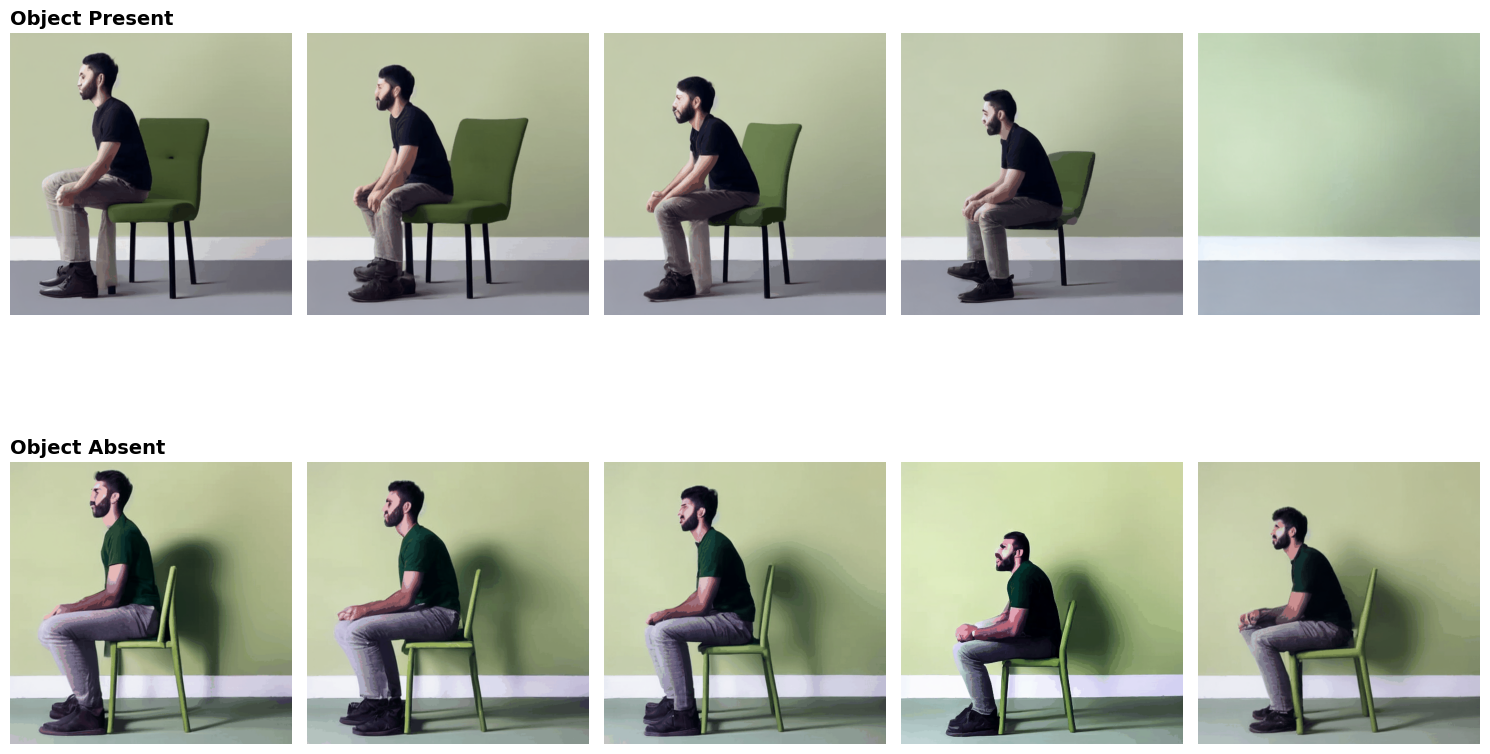

In [105]:
data_chair = {
    'textual alignment': [df_chair_present.mean().iloc[0], df_chair_absent.mean().iloc[0]],
    'temporal consistency': [df_chair_present.mean().iloc[1], df_chair_absent.mean().iloc[1]],
    'overall quality': [df_chair_present.mean().iloc[2], df_chair_absent.mean().iloc[2]]
}

index = ['Object Present', 'Object Absent']

df_chair = pd.DataFrame(data_chair, index=index)
print("Object: Green dining chair")
print(df_chair)
display_two_gifs(curr_dir + "/Images/a man is sitting on a green dining chair.gif",
                 curr_dir + "/Images/a man is sitting on a green dining chair absent.gif",
                 "Object Present",
                 "Object Absent")

Object: Shopping bag
                textual alignment  temporal consistency  overall quality
Object Present           8.647059              5.823529         6.117647
Object Absent            7.235294              4.176471         5.000000


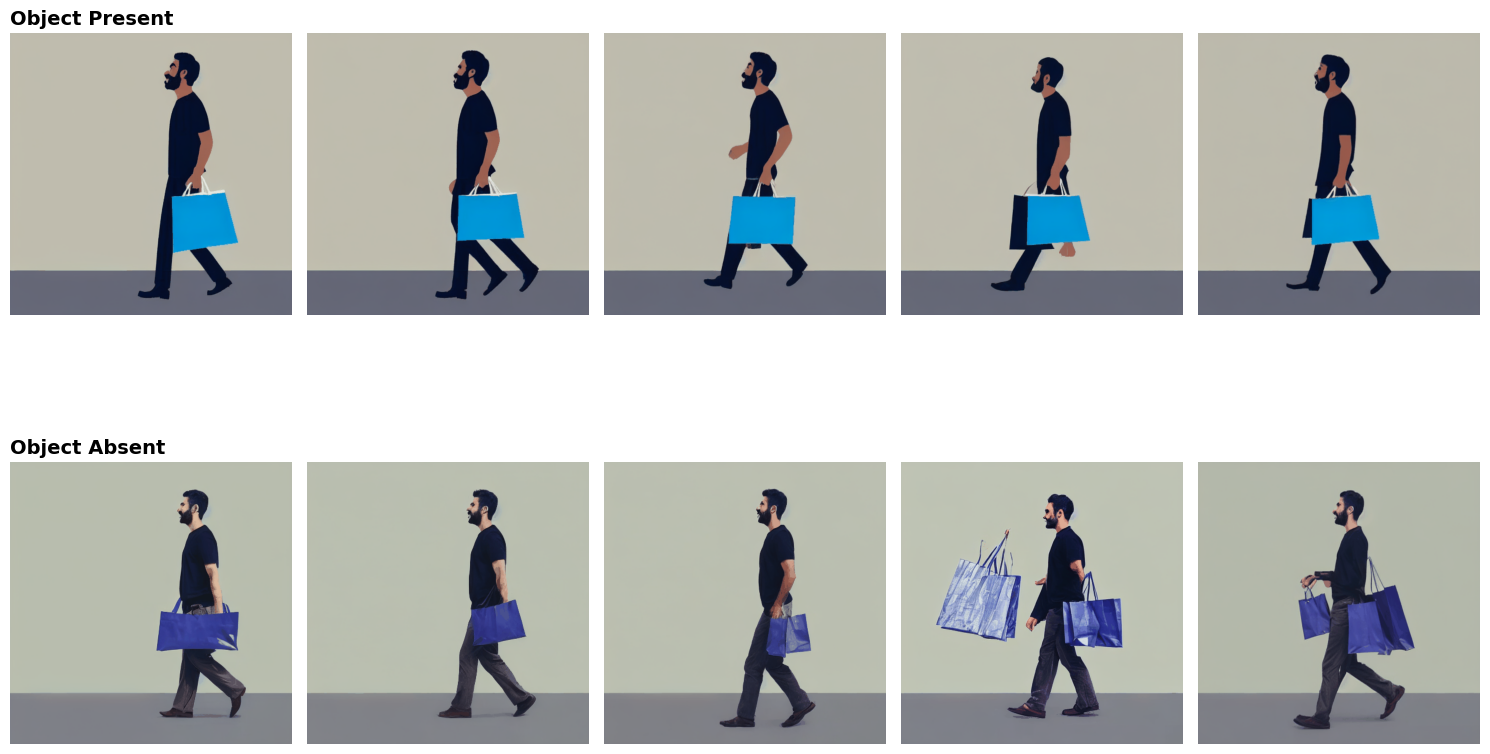

In [106]:
df_bag_present = numerical_columns_df.iloc[:, [3, 4, 5]].copy()
df_bag_absent = numerical_columns_df.iloc[:, [15, 16, 17]].copy()

data_bag = {
    'textual alignment': [df_bag_present.mean().iloc[0], df_bag_absent.mean().iloc[0]],
    'temporal consistency': [df_bag_present.mean().iloc[1], df_bag_absent.mean().iloc[1]],
    'overall quality': [df_bag_present.mean().iloc[2], df_bag_absent.mean().iloc[2]]
}

index = ['Object Present', 'Object Absent']

df_bag = pd.DataFrame(data_bag, index=index)
print("Object: Shopping bag")
print(df_bag)
display_two_gifs(curr_dir + "/Images/a man is carrying a shopping bag.gif",
                 curr_dir + "/Images/a man is carrying a shopping bag absent.gif",
                 "Object Present",
                 "Object Absent")

Object: Blue tennis racket
                textual alignment  temporal consistency  overall quality
Object Present           6.000000              6.411765         6.941176
Object Absent            7.294118              4.529412         5.294118


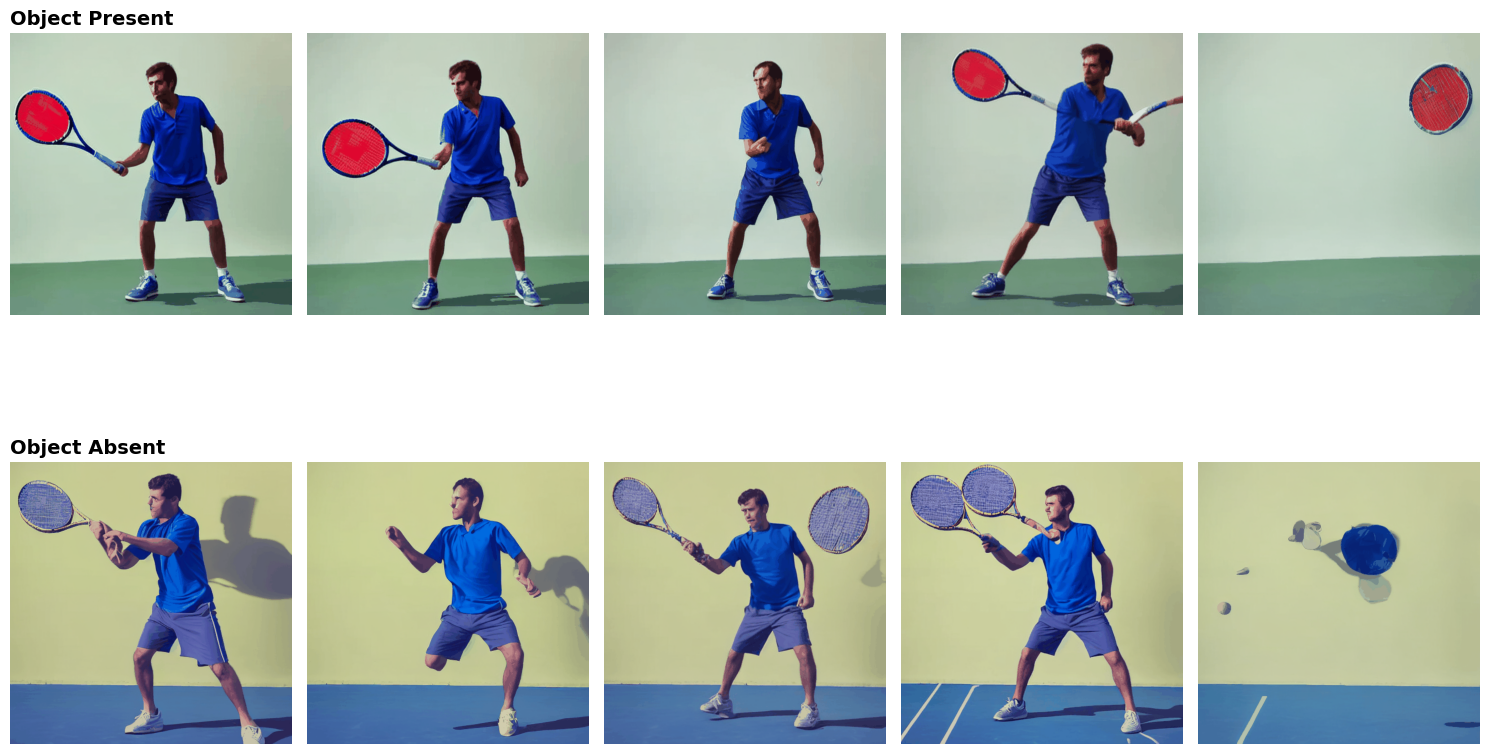

In [107]:
df_racket_present = numerical_columns_df.iloc[:, [18, 19, 20]].copy()
df_racket_absent = numerical_columns_df.iloc[:, [6, 7, 8]].copy()

data_racket = {
    'textual alignment': [df_racket_present.mean().iloc[0], df_racket_absent.mean().iloc[0]],
    'temporal consistency': [df_racket_present.mean().iloc[1], df_racket_absent.mean().iloc[1]],
    'overall quality': [df_racket_present.mean().iloc[2], df_racket_absent.mean().iloc[2]]
}

index = ['Object Present', 'Object Absent']

df_racket = pd.DataFrame(data_racket, index=index)
print("Object: Blue tennis racket")
print(df_racket)
display_two_gifs(curr_dir + "/Images/a man is swinging a blue tennis racket.gif",
                 curr_dir + "/Images/a man is swinging a blue tennis racket absent.gif",
                 "Object Present",
                 "Object Absent")

Object: Red suitcase
                textual alignment  temporal consistency  overall quality
Object Present           8.941176              7.411765         7.823529
Object Absent            7.647059              4.294118         5.411765


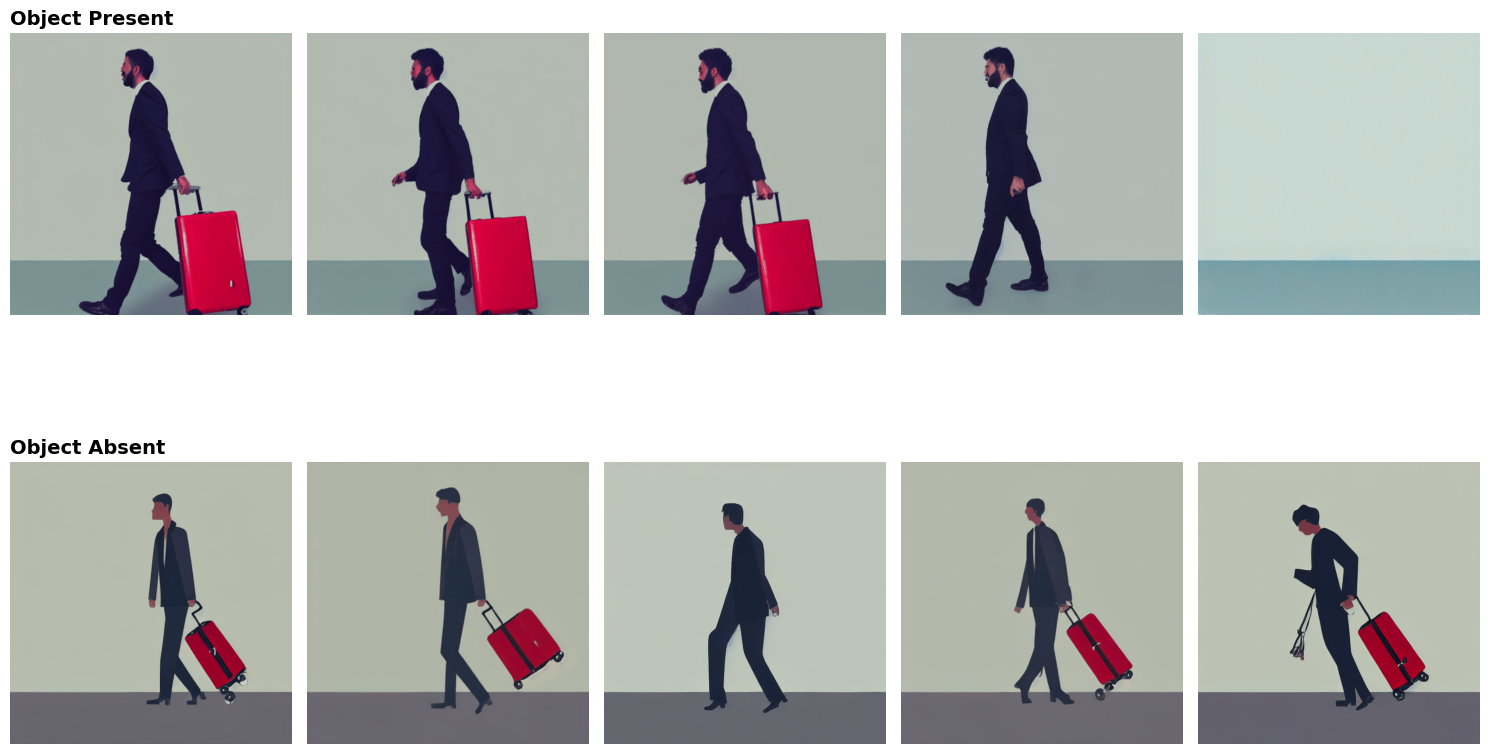

In [108]:
df_suitcase_present = numerical_columns_df.iloc[:, [21, 22, 23]].copy()
df_suitcase_absent = numerical_columns_df.iloc[:, [9, 10, 11]].copy()

data_suitcase = {
    'textual alignment': [df_suitcase_present.mean().iloc[0], df_suitcase_absent.mean().iloc[0]],
    'temporal consistency': [df_suitcase_present.mean().iloc[1], df_suitcase_absent.mean().iloc[1]],
    'overall quality': [df_suitcase_present.mean().iloc[2], df_suitcase_absent.mean().iloc[2]]
}

index = ['Object Present', 'Object Absent']

df_suitcase = pd.DataFrame(data_suitcase, index=index)
print("Object: Red suitcase")
print(df_suitcase)
display_two_gifs(curr_dir + "/Images/a man is dragging a red suitcase.gif",
                 curr_dir + "/Images/a man is dragging a red suitcase absent.gif",
                 "Object Present",
                 "Object Absent")

## Non-Numerical Data Type

in the second part of the survey the participants ask to choose between two videos,

one generated from the object-present video and the other from the object-absent video.

Pair #1 wooden stool - A original B pretending

Pair #2 plastic bucket - A pretending B original

Pair #3 red tennis racket - A original B pretending

Pair #4 an aluminum suitcase - A pretending B original



In [67]:
non_numerical_columns_df = df_cleaned.select_dtypes(exclude=['number'])
value_counts = non_numerical_columns_df.apply(pd.Series.value_counts)
print(value_counts)

   which option better matches the description: "A man is sitting on a wooden stool?"  \
A                                                  1                                    
B                                                 16                                    

   Which option looks more natural in terms of motion?  \
A                                                  4     
B                                                 13     

   Which option is aesthetically better?  \
A                                      1   
B                                     16   

   which option better matches the description: "A man is carrying a plastic bucket?"  \
A                                                  9                                    
B                                                  8                                    

   Which option looks more natural in terms of motion?.1  \
A                                                 11       
B                                   

In [68]:
textual_re = non_numerical_columns_df.iloc[:, [0, 3, 6, 9]].copy() # textual alignment
textual_re_count = textual_re.apply(pd.Series.value_counts)
textual_re_count.fillna(0, inplace=True) # Replace NaN values with 0
textual_re_count = textual_re_count.astype(int) # Convert float to integer
textual_re_count


which option better matches the description: "A man is sitting on a wooden stool?"  \
A                                                  1                                    
B                                                 16                                    

   which option better matches the description: "A man is carrying a plastic bucket?"  \
A                                                  9                                    
B                                                  8                                    

   which option better matches the description: "A man is swinging a red tennis racket?"  \
A                                                 15                                       
B                                                  2                                       

   which option better matches the description: "A man is dragging an aluminum suitcase?"  
A                                                  2                                       
B                                                 15

In [69]:
temporal_re = non_numerical_columns_df.iloc[:, [1, 4, 7, 10]].copy() # temporal consistency
temporal_re_count = temporal_re.apply(pd.Series.value_counts)
temporal_re_count.fillna(0, inplace=True) # Replace NaN values with 0
temporal_re_count = temporal_re_count.astype(int) # Convert float to integer
temporal_re_count

Which option looks more natural in terms of motion?  \
A                                                  4     
B                                                 13     

   Which option looks more natural in terms of motion?.1  \
A                                                 11       
B                                                  6       

   Which option looks more natural in terms of motion?.2  \
A                                                 15       
B                                                  2       

   Which option looks more natural in terms of motion?.3  
A                                                  0      
B                                                 17

In [70]:
overall_re = non_numerical_columns_df.iloc[:, [2, 5, 8, 11]].copy() # overall quality
overall_re_count = overall_re.apply(pd.Series.value_counts)
overall_re_count.fillna(0, inplace=True) # Replace NaN values with 0
overall_re_count = overall_re_count.astype(int) # Convert float to integer
overall_re_count

Which option is aesthetically better?  \
A                                      1   
B                                     16   

   Which option is aesthetically better?.1  \
A                                       11   
B                                        6   

   Which option is aesthetically better?.2  \
A                                       13   
B                                        4   

   Which option is aesthetically better?.3  
A                                        0  
B                                       17

we want to change the row name to 'Object Present' and 'Object Absent' to avoid confusion, but since the order was random A was 'Object Present' in pairs 1 and 3 and 'Object Absent' in pairs 2 and 4.

In [71]:
def switch_rows(df):
  # Switch the values
  df_copy = df.copy()
  # second pair
  df_copy.iloc[0, 1] = df.iloc[1, 1]
  df_copy.iloc[1, 1] = df.iloc[0, 1]
  # firth pair
  df_copy.iloc[0, 3] = df.iloc[1, 3]
  df_copy.iloc[1, 3] = df.iloc[0, 3]
  return df_copy

def change_names(df):
  df_new = df.rename(columns={df.columns[0]: 'wooden stool',
                          df.columns[1]: 'plastic bucket',
                          df.columns[2]: 'red tennis racket',
                          df.columns[3]: 'aluminum suitcase'},
                  index={'A': 'Object Present', 'B': 'Object Absent'})
  return df_new

In [72]:
textual_re_count_new = switch_rows(textual_re_count)
textual_re_count_new = change_names(textual_re_count_new)
print("textual alignment")
textual_re_count_new

textual alignment


wooden stool  plastic bucket  red tennis racket  \
Object Present             1               8                 15   
Object Absent             16               9                  2   

                aluminum suitcase  
Object Present                 15  
Object Absent                   2

In [73]:
temporal_re_count_new = switch_rows(temporal_re_count)
temporal_re_count_new = change_names(temporal_re_count_new)
print("temporal consistency")
temporal_re_count_new

temporal consistency


wooden stool  plastic bucket  red tennis racket  \
Object Present             4               6                 15   
Object Absent             13              11                  2   

                aluminum suitcase  
Object Present                 17  
Object Absent                   0

In [74]:
overall_re_count_new = switch_rows(overall_re_count)
overall_re_count_new = change_names(overall_re_count_new)
print("overall quality")
overall_re_count_new

overall quality


wooden stool  plastic bucket  red tennis racket  \
Object Present             1               6                 13   
Object Absent             16              11                  4   

                aluminum suitcase  
Object Present                 17  
Object Absent                   0

## Calculate Percentages

we want to interpert the values from counters to percentage.

df.div(df.sum(axis=0), axis=1) divides each value in the DataFrame by the sum of its column (axis=0 specifies that we are summing along columns).

we use .round(2) to round the values to two decimal places for better readability.

In [77]:
textual_percentage = textual_re_count_new.div(overall_re_count_new.sum(axis=0), axis=1) * 100
textual_percentage = textual_percentage.round(2)
print("textual alignment [%]")
textual_percentage

textual alignment [%]


wooden stool  plastic bucket  red tennis racket  \
Object Present          5.88           47.06              88.24   
Object Absent          94.12           52.94              11.76   

                aluminum suitcase  
Object Present              88.24  
Object Absent               11.76

In [78]:
temporal_percentage = temporal_re_count_new.div(overall_re_count_new.sum(axis=0), axis=1) * 100
temporal_percentage = temporal_percentage.round(2)
print("temporal consistency [%]")
temporal_percentage

temporal consistency [%]


wooden stool  plastic bucket  red tennis racket  \
Object Present         23.53           35.29              88.24   
Object Absent          76.47           64.71              11.76   

                aluminum suitcase  
Object Present              100.0  
Object Absent                 0.0

In [79]:
overall_percentage = overall_re_count_new.div(overall_re_count_new.sum(axis=0), axis=1) * 100
overall_percentage = overall_percentage.round(2)
print("overall quality [%]")
overall_percentage

overall quality [%]


wooden stool  plastic bucket  red tennis racket  \
Object Present          5.88           35.29              76.47   
Object Absent          94.12           64.71              23.53   

                aluminum suitcase  
Object Present              100.0  
Object Absent                 0.0

# Precentage by object

Object: Wooden stool [%]
                Textual  Temporal  Overall
Object Present     5.88     23.53     5.88
Object Absent     94.12     76.47    94.12


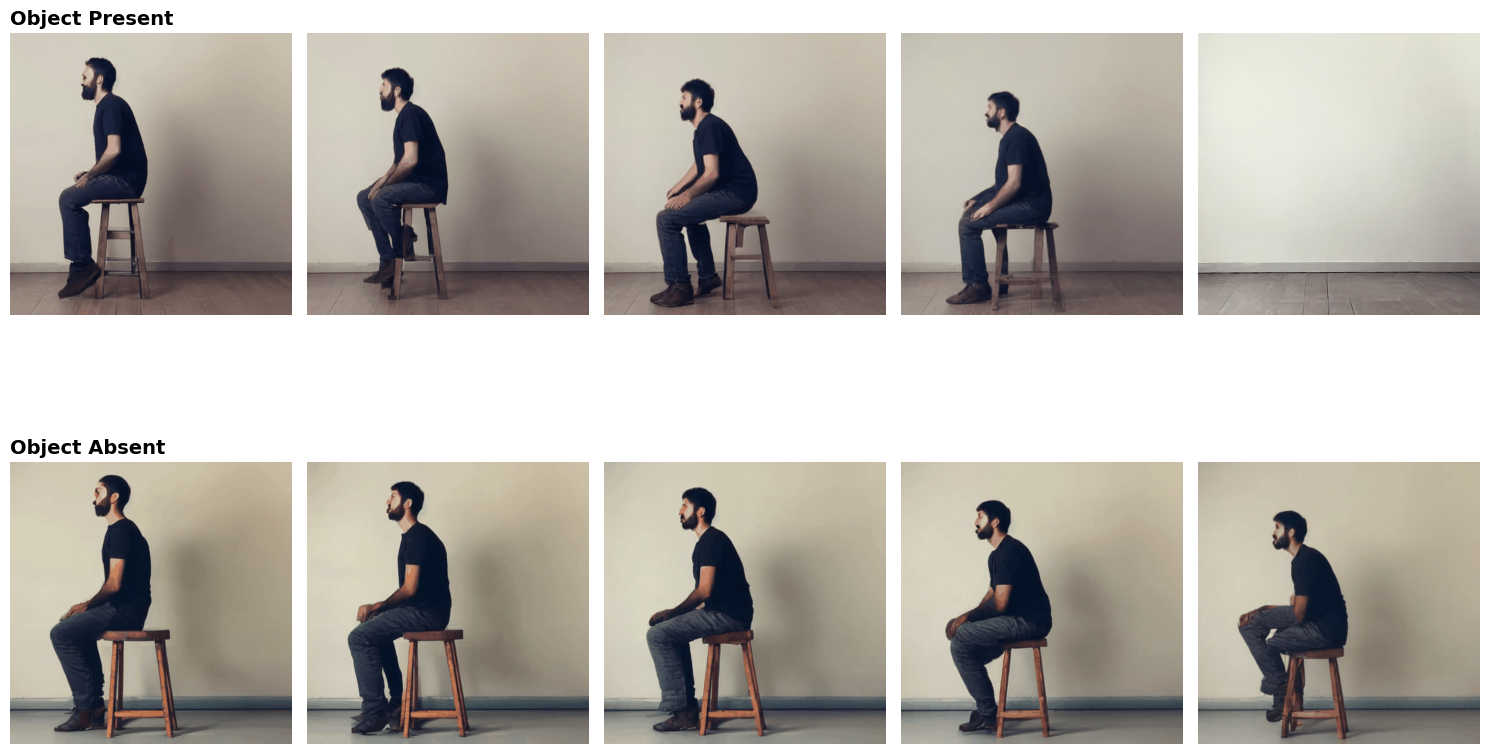

In [109]:
# Create a new DataFrame by combining the selected columns
df_wooden_stool = pd.DataFrame({
    'Textual': textual_percentage.iloc[:, 0],
    'Temporal': temporal_percentage.iloc[:, 0],
    'Overall': overall_percentage.iloc[:, 0]
})

# Display the resulting DataFrame
print("Object: Wooden stool [%]")
print(df_wooden_stool)
display_two_gifs(curr_dir + "/Images/a man is sitting on a wooden stool.gif",
                 curr_dir + "/Images/a man is sitting on a wooden stool absent.gif",
                 "Object Present",
                 "Object Absent")

Object: Plastic bucket [%]
                Textual  Temporal  Overall
Object Present    47.06     35.29    35.29
Object Absent     52.94     64.71    64.71


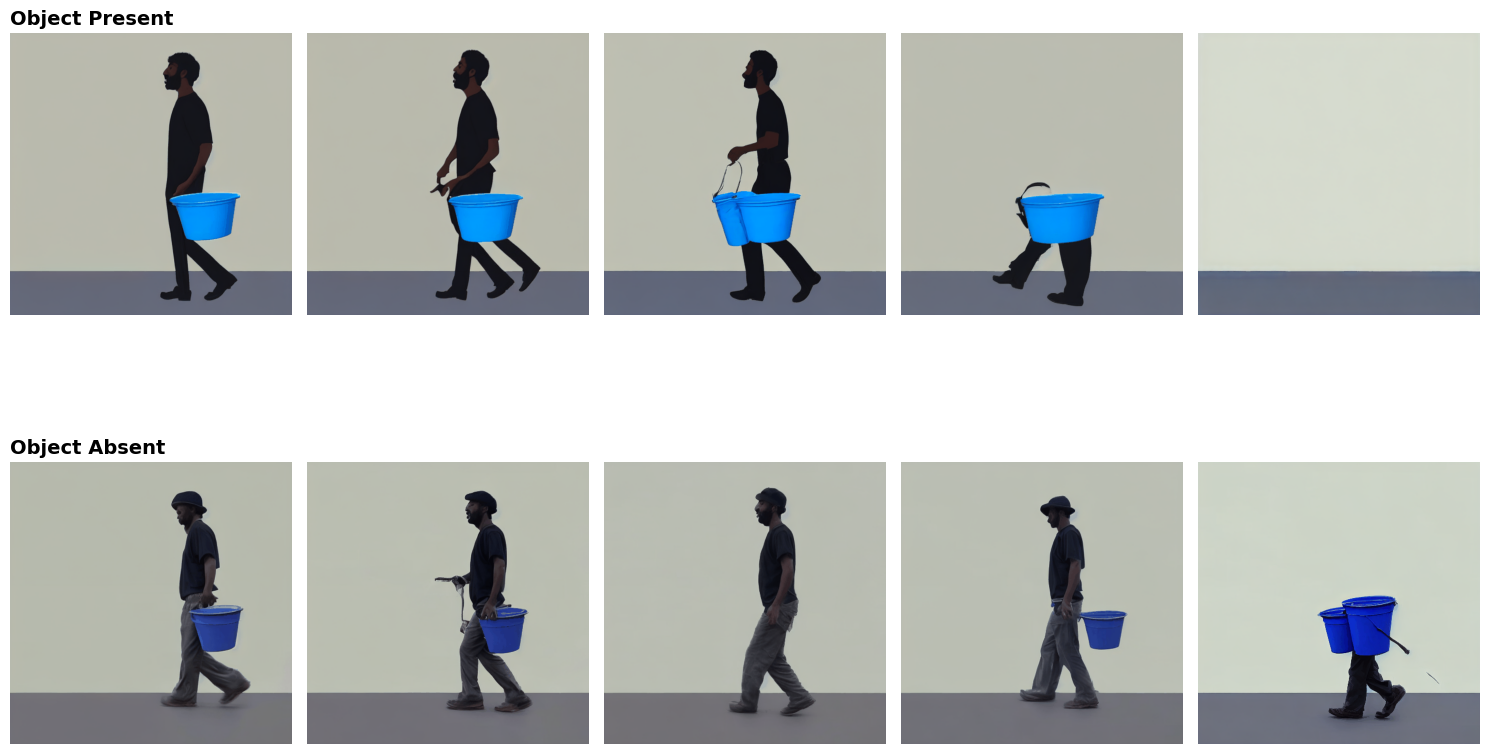

In [110]:
# Create a new DataFrame by combining the selected columns
df_plastic_bucket = pd.DataFrame({
    'Textual': textual_percentage.iloc[:, 1],
    'Temporal': temporal_percentage.iloc[:, 1],
    'Overall': overall_percentage.iloc[:, 1]
})

# Display the resulting DataFrame
print("Object: Plastic bucket [%]")
print(df_plastic_bucket)
display_two_gifs(curr_dir + "/Images/a man is carrying a plastic bucket.gif",
                 curr_dir + "/Images/a man is carrying a plastic bucket absent.gif",
                 "Object Present",
                 "Object Absent")

Object: Red tennis racket [%]
                Textual  Temporal  Overall
Object Present    88.24     88.24    76.47
Object Absent     11.76     11.76    23.53


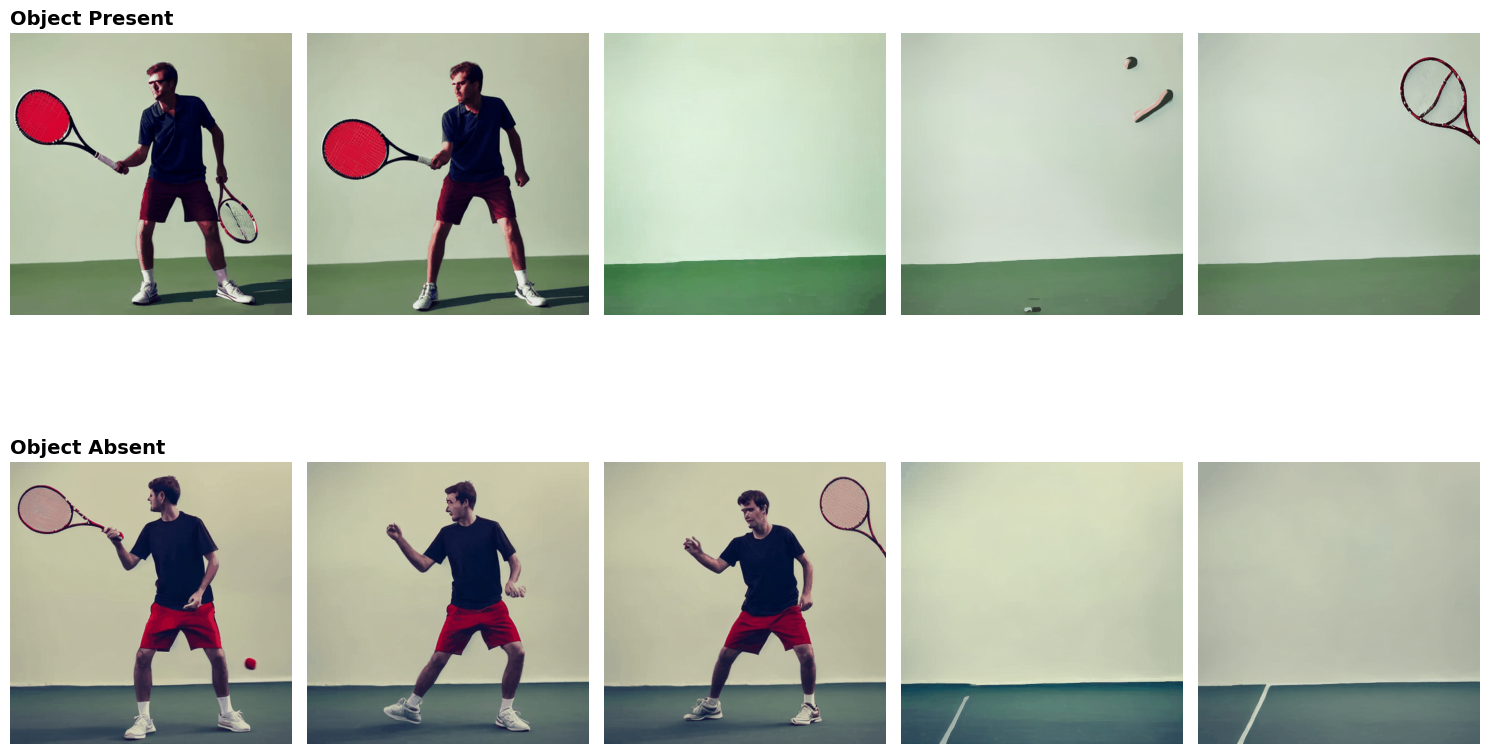

In [111]:
# Create a new DataFrame by combining the selected columns
df_red_racket = pd.DataFrame({
    'Textual': textual_percentage.iloc[:, 2],
    'Temporal': temporal_percentage.iloc[:, 2],
    'Overall': overall_percentage.iloc[:, 2]
})

# Display the resulting DataFrame
print("Object: Red tennis racket [%]")
print(df_red_racket)
display_two_gifs(curr_dir + "/Images/a man is swinging a red tennis racket.gif",
                 curr_dir + "/Images/a man is swinging a red tennis racket absent.gif",
                 "Object Present",
                 "Object Absent")

Object: Alumnium suitcase [%]
                Textual  Temporal  Overall
Object Present    88.24     100.0    100.0
Object Absent     11.76       0.0      0.0


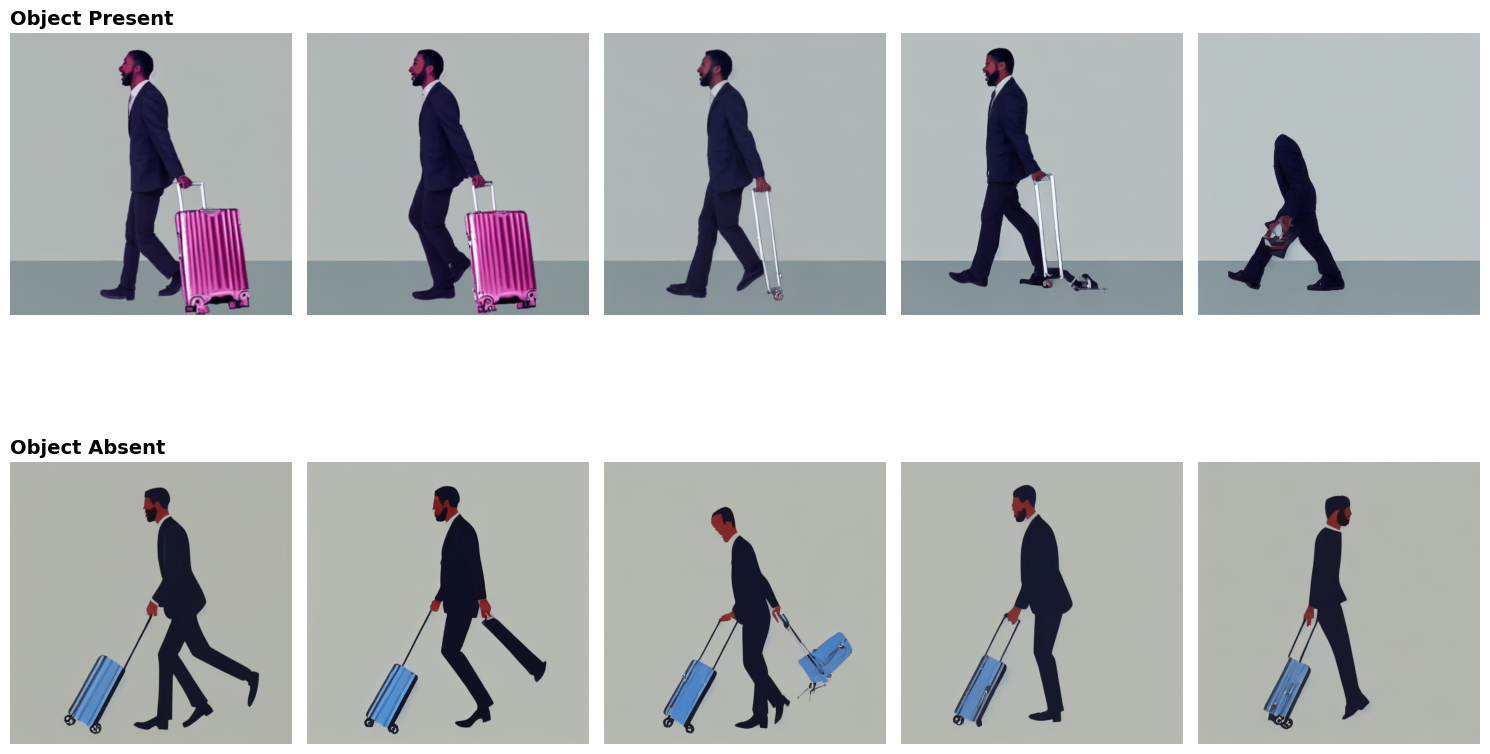

In [112]:
# Create a new DataFrame by combining the selected columns
df_alumnium_suitcase = pd.DataFrame({
    'Textual': textual_percentage.iloc[:, 3],
    'Temporal': temporal_percentage.iloc[:, 3],
    'Overall': overall_percentage.iloc[:, 3]
})

# Display the resulting DataFrame
print("Object: Alumnium suitcase [%]")
print(df_alumnium_suitcase)
display_two_gifs(curr_dir + "/Images/a man is dragging an aluminum suitcase.gif",
                 curr_dir + "/Images/a man is dragging an aluminum suitcase absent.gif",
                 "Object Present",
                 "Object Absent")